collect all image into sql

In [2]:
%pip install keyboard

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import keyboard
import mysql.connector as con

cursor = con.connect(
    host = '127.0.0.1',
    user = 'root',
    password = '123456',
    database = 'the_volume_of_car'
)

con = cursor.cursor()

url = 'https://cctvn.freeway.gov.tw/abs2mjpg/bmjpg?camera=13380'

query = "insert into images (image) values (%s)"

i = 0

while True:
    
    cap = cv2.VideoCapture(url)
    ret,image = cap.read()
    
    if ret == False:
        cap = cv2.VideoCapture(url)
        ret,image = cap.read()  
        continue
    
    _,bullr = cv2.imencode('.jpg',image)
    print(_)
    
    if i % 25 == 0:
        image_bytes = bullr.tobytes()
        con.execute(query,(image_bytes,))
        cursor.commit()
        print("✅ Frame inserted into the database.")

    if keyboard.is_pressed('q'):
        
        print("🔚 'q' pressed. Exiting loop.")
        break




cursor.close()

cap.release()
cv2.destroyAllWindows()  


InterfaceError: 2002: Can't connect to local MySQL server through socket '%-.100s' (%s) (Warning: not all arguments converted during string formatting)

(240, 352, 3)


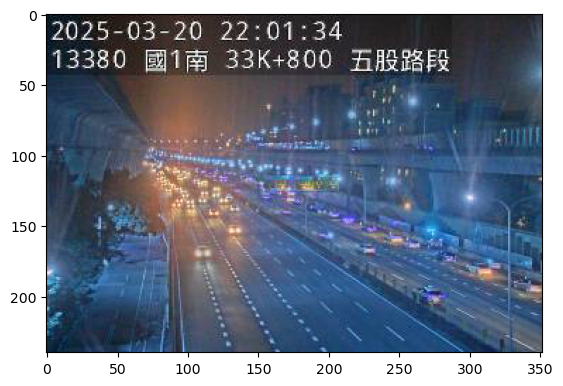

In [2]:
import matplotlib.pyplot as plt 
import cv2 
url = 'https://cctvn.freeway.gov.tw/abs2mjpg/bmjpg?camera=13380'

while True:
    
    cap = cv2.VideoCapture(url)
    
    ret,frame = cap.read()
    
    print(frame.shape)
    if ret == True :
        
        plt.imshow(frame)
        
        break
        

In [2]:
%pip install mysql

  Using cached mysql-0.0.3-py3-none-any.whl.metadata (746 bytes)
  Using cached mysqlclient-2.2.7.tar.gz (91 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mysqlclient: filename=mysqlclient-2.2.7-cp312-cp312-linux_x86_64.whl size=80696 sha256=73f3a1bc3dd8aca026a08ab6b6e7066a2025cea8148f9d488431172b11cd77d6
  Stored in directory: /home/ruizhong/.cache/pip/wheels/27/95/18/7f176fffd46629e710c04c810b9c4d7d4358fe7c96a7d2306d
Successfully built mysqlclient
Note: you may need to restart the kernel to use updated packages.
